In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import time
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
site_url = 'https://myanimelist.net/anime/season'
response = requests.get(site_url)
response.status_code

200

In [3]:
html=urlopen(site_url)
soup = BeautifulSoup(html, 'lxml')
type(soup)


bs4.BeautifulSoup

Failed to download or save image at index 0: 500 Server Error: Internal Server Error for url: https://example.com/c/img/images/event/Mini_Banner_20240916_FAL_Fall_2024/mini-banner.png
Failed to download or save image at index 1: 500 Server Error: Internal Server Error for url: https://example.com/c/img/images/event/BR_20240923_PDA/PDA_PC_top.jpg
Saved image: downloaded_images\image_2.jpg


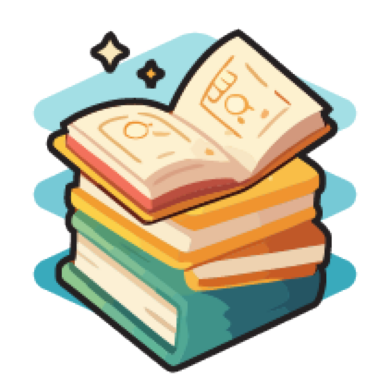

Failed to download or save image at index 3: 500 Server Error: Internal Server Error for url: https://example.com/images/event/20240916_FAL_2024_Fall/seasonal_text_banner.png
Saved image: downloaded_images\image_4.jpg


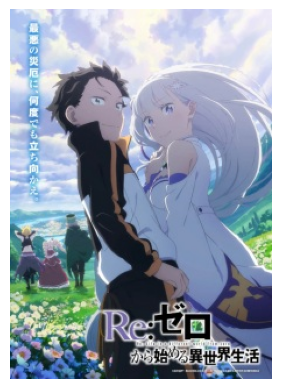

Saved image: downloaded_images\image_5.jpg


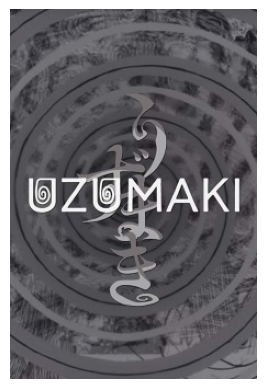

Saved image: downloaded_images\image_6.jpg


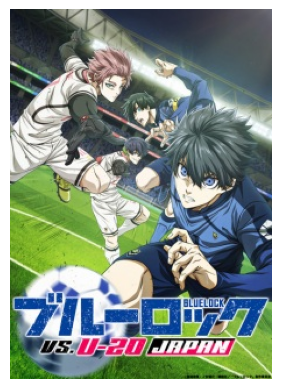

KeyboardInterrupt: 

In [4]:


# Make sure to create a directory to store the images
output_dir = 'downloaded_images'
os.makedirs(output_dir, exist_ok=True)

# Assuming 'soup' is already defined and contains the parsed HTML
images = soup.select('div img')
for i in range(0, min(100, len(images))):
    if 'src' in images[i].attrs:
        images_url = images[i]['src']
        
        # Fix the URL if it starts with '/'
        if images_url.startswith('/'):
            # Assuming the base URL is known (update this to your actual base URL)
            base_url = 'https://example.com'
            images_url = base_url + images_url  # Construct absolute URL

        # Download the image
        try:
            response = requests.get(images_url)
            response.raise_for_status()  # Raise an error for bad responses
            
            # Save the image
            image_name = os.path.join(output_dir, f'image_{i}.jpg')
            with open(image_name, 'wb') as f:
                f.write(response.content)
                

            print(f"Saved image: {image_name}")
           
            # Close the previously opened image if it exists
            

            # Open the image (optional)
            open_image = Image.open(BytesIO(response.content))
            # open_image.show()
            plt.imshow(open_image)
            plt.axis('off')  # Hide axes
            plt.show(block=False)  # Show the image without blocking
            plt.pause(3)  # Pause for 3 seconds
            plt.close() 
            
            
        except Exception as e:
            print(f"Failed to download or save image at index {i}: {e}")
            
    else:
        print(f"Image at index {i} has no 'src' attribute.")

# Close the last opened image if it exists
# if open_image is not None:
#     open_image.close()
